**Epochs set to a very larger value to see the model behaviour**

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
batch_size = 200
num_classes = 10
epochs = 200

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Dense(640, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(640, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 640)               1966720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 640)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 640)               410240    
_________________________________________________________________
dropout_2 (Dropout)          (None, 640)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6410      
Total params: 2,383,370
Trainable params: 2,383,370
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 18s 358us/step - loss: 0.0886 - acc: 0.1644 - val_loss: 0.0852 - val_acc: 0.2469
Epoch 2/200
50000/50000 [==============================] - 17s 348us/step - loss: 0.0852 - acc: 0.2396 - val_loss: 0.0826 - val_acc: 0.2966
Epoch 3/200
50000/50000 [==============================] - 17s 347us/step - loss: 0.0831 - acc: 0.2765 - val_loss: 0.0810 - val_acc: 0.3266
Epoch 4/200
50000/50000 [==============================] - 17s 346us/step - loss: 0.0818 - acc: 0.2999 - val_loss: 0.0798 - val_acc: 0.3407
Epoch 5/200
50000/50000 [==============================] - 17s 347us/step - loss: 0.0807 - acc: 0.3171 - val_loss: 0.0788 - val_acc: 0.3530
Epoch 6/200
50000/50000 [==============================] - 17s 347us/step - loss: 0.0798 - acc: 0.3315 - val_loss: 0.0779 - val_acc: 0.3606
Epoch 7/200
50000/50000 [==============================] - 18s 350us/step - loss: 0.0790 - acc: 0.3424 - val_l

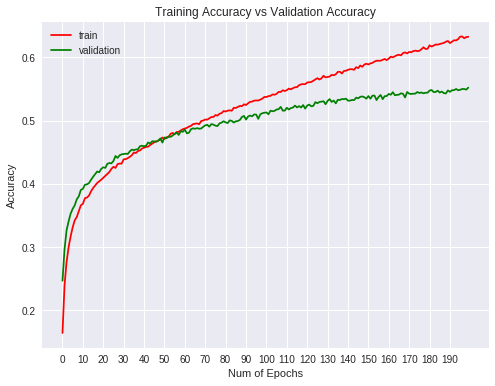

In [0]:
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 200, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

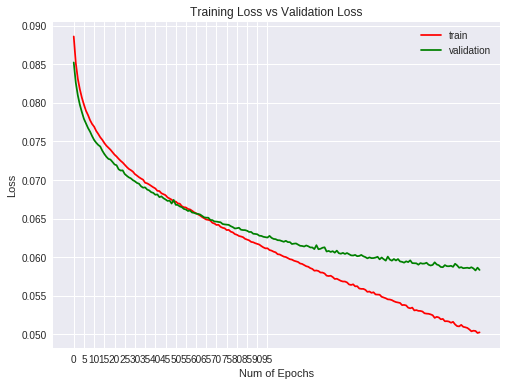

In [0]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 100, 5.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

**Conclusion:**
Epochs increased to a higher level and the model starts overfitting.